In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pprint 

# Import API key
import api_keys
consumer_key = api_keys.consumer_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(consumer_key)

elVqMFVWgCUQBEDOR7vsfFsI7


## Generate Cities List

In [35]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Create dataframe for city weather data
city_weather_df = pd.DataFrame({"City": cities})

# Add new columns to hold weather data
city_weather_df["Cloudiness"] = 0
city_weather_df["Country"] = ""
city_weather_df["Date"] = 0
city_weather_df["Humidity"] = 0
city_weather_df["Lat"] = 0
city_weather_df["Lng"] = 0
city_weather_df["Max Temp"] = 0
city_weather_df["Wind Speed"] = 0

city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
618,tafresh,0,,0,0,0,0,0,0
619,aktau,0,,0,0,0,0,0,0
620,yangliuqing,0,,0,0,0,0,0,0
621,margate,0,,0,0,0,0,0,0
622,esso,0,,0,0,0,0,0,0


In [36]:
#Preview Json file
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + consumer_key + "&q="
# base_url = url + city
# response = requests.get(base_url).json()
# response

## Perform API Calls

In [61]:
# OpenWeatherMap API Key
consumer_key = api_keys.consumer_key


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + consumer_key + "&q="


print("Begin Weather Data Retrieval      ")
print("----------------------------------")

# Iterate through rows to get weather data
for index, row in city_weather_df.iterrows():
    city = row["City"]
    base_url = url + city
    
    # Make API Requests
    response = requests.get(base_url).json()
    
    # Use try/except to skip over cities with no data
    try:
        print(f"Processing Record # {index+1} | {city}")
        print(base_url)
        city_weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        city_weather_df.loc[index, "Country"] = response["sys"]["country"]
        city_weather_df.loc[index, "Date"] = response["dt"]
        city_weather_df.loc[index, "Lat"] = response["coord"]["lat"]
        city_weather_df.loc[index, "Lng"] = response["coord"]["lon"]
        city_weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        city_weather_df.loc[index, "Max Temp"] = response["main"]["temp"]
        city_weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
    
    except:
        print("Skipping...Data Not Found For " + city)
        

# Print Data loading Complete statement     
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begin Weather Data Retrieval      
----------------------------------
-----------------------------
Data Retrieval Complete      
-----------------------------


In [62]:
# Remove rows(cities) with no data
city_weather_df["Date"].replace(0, np.nan, inplace=True)
city_weather_df.dropna(subset=["Date"], how="any", inplace=True)

In [63]:
# Preview appended weather dataframe
city_weather_df.tail()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [49]:
#Create csv file for weather data output
city_weather_df.to_csv("WeatherData.csv", index=False)

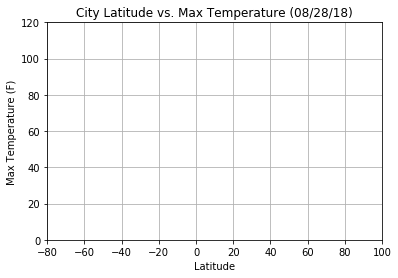

In [56]:
# Build scatterplot for latitude and temperature
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Temp.png")

# Show plot
plt.show()

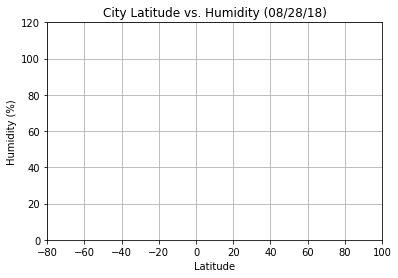

In [51]:
# Build scatterplot for latitude and humidity
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Humid.png")

# Show plot
plt.show()

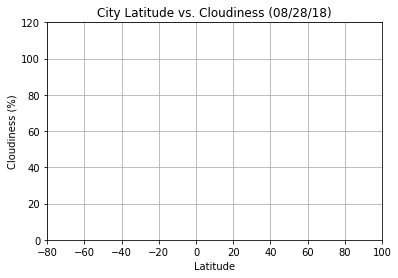

In [52]:
# Build scatterplot for latitude and cloudiness
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(0, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Cloud.png")

# Show plot
plt.show()

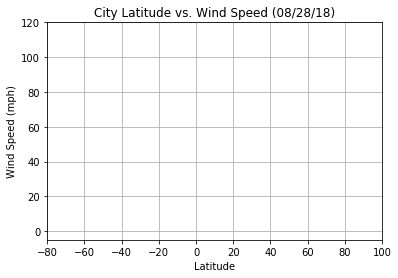

In [53]:
# Build scatterplot for latitude and wind speed
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], edgecolor="black", marker="o", alpha=0.8, linewidths=1)

# Set upper and lower limits of x and y axis
plt.xlim(-80, 100)
plt.ylim(-5, 120)

# Incorporate graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save figure
plt.savefig("Lat_v_Wind.png")

# Show plot
plt.show()